In [29]:
import pandas as pd
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


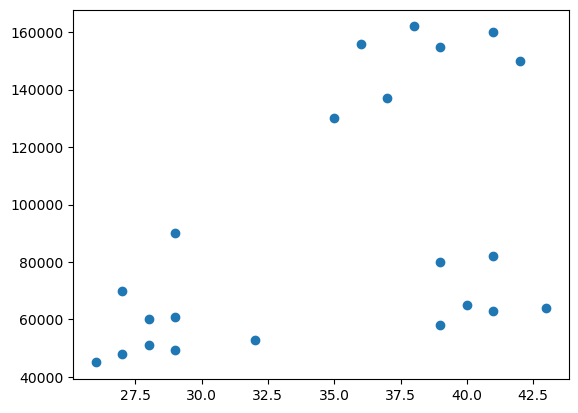

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])   # GRAPH FOR FINDING THE NUMBER OF CLUSTERS

In [31]:
from sklearn.cluster import KMeans as km
kdf=km(n_clusters=3)  # THERE ARE 3 DIFFERENT GROUPS SO CLUSTERS = 3
kdf                  # CREATING THE MODEL FROM KMEANS

KMeans(n_clusters=3)

In [32]:
pred_op=kdf.fit_predict(df[['Age','Income($)']])
pred_op       # PREDICTING THE OUPUT OF THE MODEL AND STORING THE VALUES IN A VARIABLE

C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [33]:
df['cluster'] = pred_op
df                # CREATING THE ADDTIONAL COLUMN FOR THE CLUSTER VALUES

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


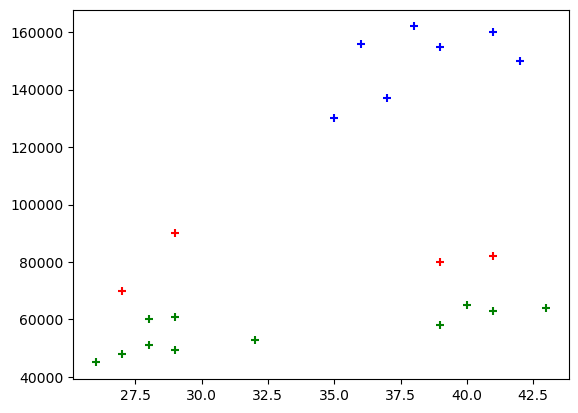

In [34]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'] , marker='+',color='green')
plt.scatter(df1['Age'],df1['Income($)'] , marker='+',color='blue')
plt.scatter(df2['Age'],df2['Income($)'] , marker='+',color='red')         # PLOTTING THE GRAPHS FOR THE CLUSTER VALUES AS POINTS AND AGE, INCOME AS x & y AXIS

In [35]:
kdf.cluster_centers_           # TO FIND THE CENTROIDS OF THE CLUSTERS

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

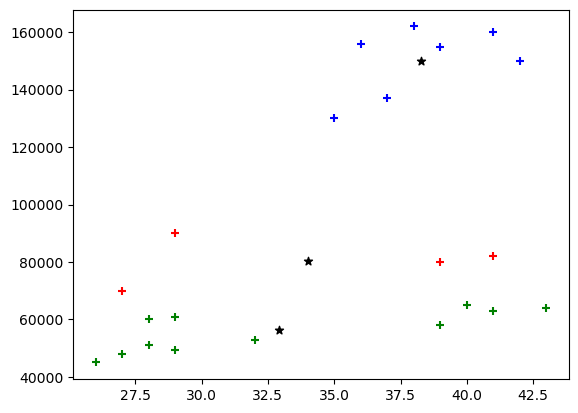

In [36]:
plt.scatter(df0['Age'],df0['Income($)'] , marker='+',color='green')
plt.scatter(df1['Age'],df1['Income($)'] , marker='+',color='blue')
plt.scatter(df2['Age'],df2['Income($)'] , marker='+',color='red')
plt.scatter(kdf.cluster_centers_[:,0] , kdf.cluster_centers_[:,1] , color = 'black' , marker = '*')

In [54]:
from sklearn.preprocessing import MinMaxScaler as mms   # THE MINMAXSCALER IS USED TO GIVE THE EQUAL SCALING VALUES TO ALL THE POINTS FOR THE x & y
scl_val = mms()

scl_val.fit(df[['Income($)']])
df['Income($)'] = scl_val.transform(df[['Income($)']])

scl_val.fit(df[['Age']])
df['Age'] = scl_val.transform(df[['Age']])

df                    # THE VALUES WILL BE CHANGED ACCORDING TO THE MISSING RANGE OF VALUES

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


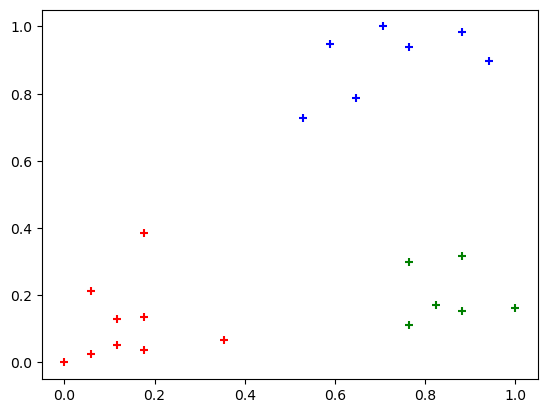

In [55]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'] , marker='+',color='green')
plt.scatter(df1['Age'],df1['Income($)'] , marker='+',color='blue')         # MARKING THE POINTS ACCORDING TO THE CLUSTER POINTS AND DIFFERENTIATION
plt.scatter(df2['Age'],df2['Income($)'] , marker='+',color='red')

In [56]:
km_ = km(n_clusters = 3)
prd_op = km_.fit_predict(df[['Age' , 'Income($)']])
prd_op                             # PREDICTING THE VALUES FOR THE MODEL CREATED

C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [57]:
df['cluster'] = prd_op
df                       # STORING THE VALUES IN THE CLUSTER COLUMN

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [58]:
km_.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

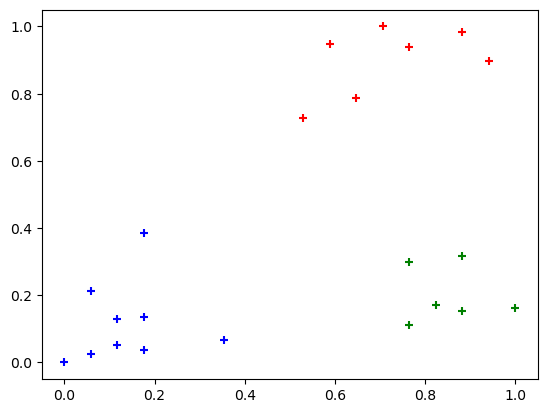

In [59]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'] , marker='+',color='green')
plt.scatter(df1['Age'],df1['Income($)'] , marker='+',color='blue')
plt.scatter(df2['Age'],df2['Income($)'] , marker='+',color='red')

In [60]:
km_.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

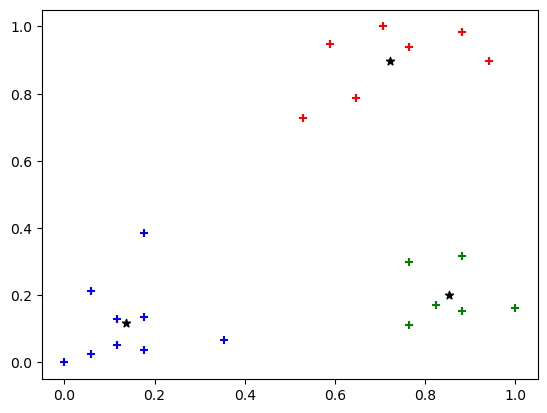

In [61]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
                                         # MARKING THE POINTS ALSO FOR THE CENTROID POINTS
plt.scatter(df0['Age'],df0['Income($)'] , marker='+',color='green')
plt.scatter(df1['Age'],df1['Income($)'] , marker='+',color='blue')
plt.scatter(df2['Age'],df2['Income($)'] , marker='+',color='red')
plt.scatter(km_.cluster_centers_[:,0] , km_.cluster_centers_[:,1] , color = 'black' , marker = '*')

In [62]:
km_.inertia_       # INERTIA MEASURES HOW WELL A DATASET WAS CLUSTERED BY K-MEANS

0.47507834985530945

In [64]:
sse = []
k_ran = range(1,6)
for i in k_ran:
    km1 = km(n_clusters = i)
    km1.fit(df[['Age' , 'Income($)']])
    sse.append(km1.inertia_)
    
sse      # THE QUALITY OF THE CLUSTER ASSIGNMENTS IS DETERMINED BY COMPUTING THE SUM OF THE SQUARED ERROR (SSE) AFTER THE CENTROIDS CONVERGE, OR MATCH THE PREVIOUS ITERATION'S ASSIGNMENT. THE SSE IS DEFINED AS THE SUM OF THE SQUARED EUCLIDEAN DISTANCES OF EACH POINT TO ITS CLOSEST CENTROID

C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\heroh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2766936276300278]